# Things I had to do in the terminal before being able to use this notebook


## Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

## go into env
conda activate ox

## install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

## makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

## other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gd
%matplotlib inline

In [44]:
place_name = "Oranienbaum-Wörlitz, Wittenberg, Sachsen-Anhalt, 06785, Germany"

In [45]:
# Specify the name that is used to seach for the data


# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)


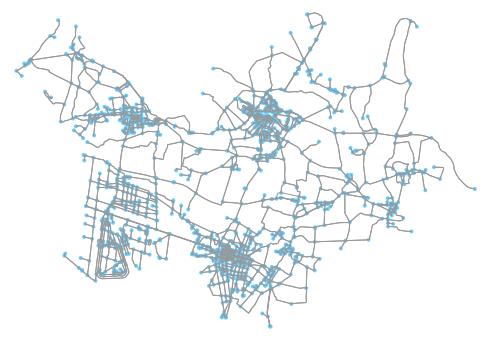

In [46]:
# Plot the streets
fig, ax = ox.plot_graph(graph)


Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [47]:
#new query for all buildings in place of interest data similar but not identical...
buildings = ox.footprints_from_place(place_name)
#bos = buildings[buildings['amenity'].isin(buildings_of_interest)]
#separation to get all shops for nicer visualization
shop = buildings[buildings['shop'].notnull()]


In [48]:
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['place_of_worship', 'townhall', 'bank', 'restaurant', 'cafe', 'school', 'police', 'fire_station', 'bicycle_parking', 'toilets', 'fast_food', 'shelter']
shop = ['supermarket']
building = ['retail', 'yes', 'church', 'industrial', 'office', 'manufacture', 'temple', 'house', 'school', 'sports_hall', 'apartments', 'residential', 'garages', 'chapel', 'ruins', 'civic', 'farm_auxiliary', 'train_station', 'commercial', 'garage', 'transformer_tower', 'roof']
['amenity', 'shop', 'building']


In [49]:
#make geopandas of place of interest
#whole area
area = ox.gdf_from_place(place_name)
#basically all the ways one can move on !!BEWARE!! to my knowledge also not streets
nodes, edges = ox.graph_to_gdfs(graph)


In [50]:
#extra just for hospitals for nicer visulisation
healthcare = ['baby_hatch',
             'clinic',
             'dentist',
             'doctors',
             'hospital',
             'nursing_home',
             'pharmacy',
             'social_facility',
             'veterinary']
boish = ox.pois_from_place(place_name, amenities=healthcare)
#boisr = ox.pois_from_place(place_name, shop=)

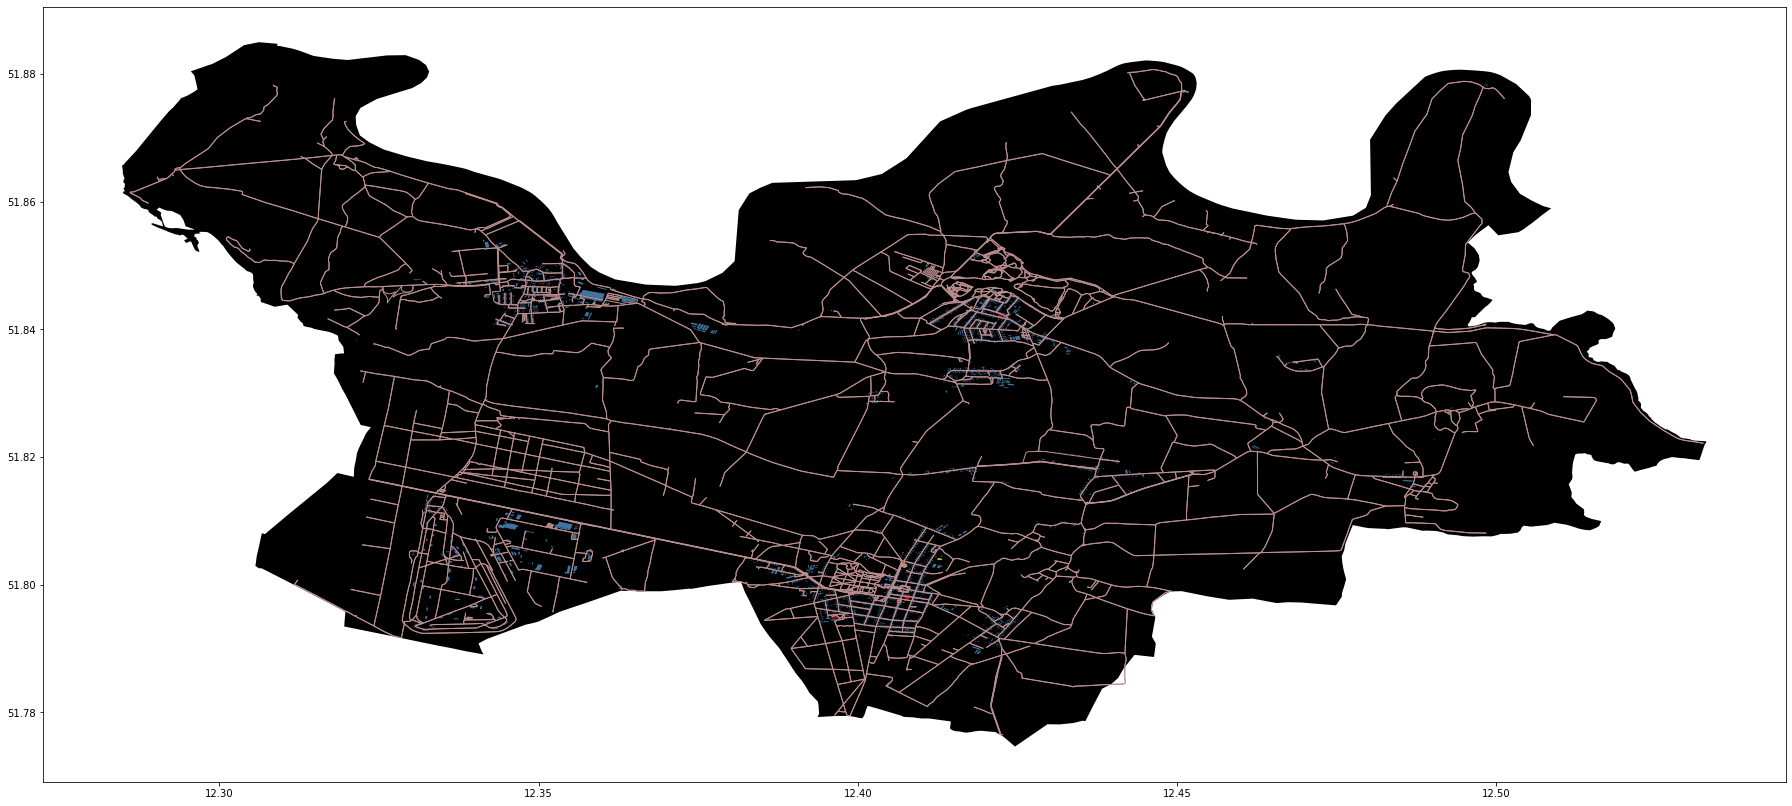

In [51]:
fig, ax = plt.subplots(figsize=(25,16))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='#BC8F8F')

# Plot buildings of interest and shops
buildings.plot(ax=ax, facecolor='steelblue', alpha=0.9)
shop.plot(ax=ax, facecolor='yellow', alpha=0.7)

# Plot healthcare
boish.plot(ax=ax, color='red', alpha=0.7, markersize=10)

plt.tight_layout()


In [52]:
boish

osmid                                           geometry  \
416500780    416500780                          POINT (12.42235 51.84225)   
3807054475  3807054475                          POINT (12.40760 51.79810)   
3812761951  3812761951                          POINT (12.40629 51.79766)   
6560751691  6560751691                          POINT (12.40769 51.79807)   
169327007    169327007  POLYGON ((12.39636 51.79497, 12.39587 51.79493...   

                      addr:city addr:country addr:housenumber addr:postcode  \
416500780   Oranienbaum-Wörlitz          NaN               65         06785   
3807054475  Oranienbaum-Wörlitz           DE               24         06785   
3812761951  Oranienbaum-Wörlitz           DE               29         06785   
6560751691                  NaN          NaN              NaN           NaN   
169327007   Oranienbaum-Wörlitz          NaN               41         06785   

                    addr:street       amenity              fax  \
416500780   Erdmannsdorffstraße      pharmacy              NaN   
3807054475         Mittelstraße       doctors              NaN   
3812761951         Brauerstraße      pharmacy  +49 34904 21847   
6560751691                  NaN      pharmacy              NaN   
169327007          Marienstraße  nursing_home              NaN   

                                   name  ...     contact:phone  \
416500780                 Park-Apotheke  ...               NaN   
3807054475           Christiane Behling  ...  +49 34904 325440   
3812761951           Gutenberg-Apotheke  ...               NaN   
6560751691           Gutenberg-Apotheke  ...               NaN   
169327007   Seniorenheim Haus Katharina  ...               NaN   

           healthcare:speciality  addr:suburb                         email  \
416500780                    NaN          NaN                           NaN   
3807054475              internal          NaN                           NaN   
3812761951                   NaN  Oranienbaum  info@apotheke-oranienbaum.de   
6560751691                   NaN          NaN                           NaN   
169327007                    NaN          NaN                           NaN   

                                                        nodes addr:housename  \
416500780                                                 NaN            NaN   
3807054475                                                NaN            NaN   
3812761951                                                NaN            NaN   
6560751691                                                NaN            NaN   
169327007   [1804967787, 1804967793, 1804967783, 180496779...            NaN   

           building  url wikidata              source  
416500780       NaN  NaN      NaN                 NaN  
3807054475      NaN  NaN      NaN                 NaN  
3812761951      NaN  NaN      NaN                 NaN  
6560751691      NaN  NaN      NaN                 NaN  
169327007       NaN  NaN      NaN  personal knowledge  

[5 rows x 29 columns]

In [54]:
buildings

nodes  \
28630190   [2277060547, 2277060556, 2277060555, 314674520...   
28707002   [315562566, 315562668, 315562564, 315562565, 3...   
28707049   [315562793, 315562794, 315562795, 315562796, 3...   
28707062   [315562838, 315562839, 315562840, 315562841, 3...   
28707092   [315562973, 315562975, 315562976, 315562978, 3...   
28707117   [315563079, 315563080, 315563081, 315563082, 3...   
28707128   [315563213, 315563215, 315563216, 315891839, 3...   
28707143   [315563424, 315563426, 315563427, 315563428, 3...   
28707552   [315567661, 315567663, 315567665, 315567667, 3...   
28707672   [315567910, 315567911, 315567912, 315567913, 3...   
28707678   [315567968, 315567969, 315567970, 315567971, 3...   
28707679   [315567973, 315567974, 315567975, 315567976, 3...   
28707687   [315568029, 315568030, 315568031, 315568032, 3...   
28730920   [315892338, 315892339, 315892340, 315892341, 3...   
28730928   [315892398, 315892399, 315892400, 315892402, 3...   
28730977   [315892726, 315892727, 315892728, 315892729, 3...   
28730996   [315892934, 315892937, 315892939, 315892941, 3...   
28731016   [315893026, 315893028, 315893030, 315893032, 3...   
28731030   [315893196, 315893197, 315893199, 315893200, 3...   
28731035   [315893302, 315893303, 315893304, 315893305, 3...   
28731037   [315893337, 315893338, 315893339, 315893341, 3...   
28731066   [315893454, 315893455, 315893456, 1036357184, ...   
32358385   [364294281, 364294283, 364294285, 364294287, 3...   
38083654   [447920040, 447920041, 447920042, 447920043, 7...   
40101516   [482629625, 482629626, 482629628, 482629629, 4...   
40118785   [482820084, 2627597783, 482820085, 2627597781,...   
40127242   [482905373, 482905374, 482905375, 482905377, 4...   
40189113   [484196857, 484196858, 484196859, 484196860, 4...   
47440188   [603769927, 1249006927, 1249007196, 1249006806...   
47440189   [603769923, 603769924, 603769925, 1246785200, ...   
47440367   [603771859, 603771856, 3039237424, 7865980105,...   
49156873   [324371164, 623523898, 623523899, 623523900, 3...   
49156874   [1036448778, 1036449667, 1036449044, 103644855...   
87586545   [1710331431, 1710331228, 1710331043, 171033118...   
89147042   [1034039353, 1034039185, 1034039014, 103403895...   
89147058   [1034039075, 1034039147, 1034039224, 103403931...   
89147061   [1034039141, 1034039118, 1034039182, 103403925...   
89309549   [1036194117, 1036194463, 1036194684, 103619397...   
89309565   [1036193364, 1036193765, 1036194071, 103619445...   
89313799   [1036243216, 1036243008, 1036243439, 103624328...   
89313806   [1036242960, 1036243050, 1036243122, 103624318...   
89313813   [1036243148, 1036243208, 1036243279, 103624339...   
89313825   [1036243028, 1036243106, 1036243173, 103624323...   
89313846   [1036243426, 1036243154, 1036243229, 103624329...   
89313855   [1036243360, 1036243435, 1036243001, 561917836...   
89337377   [1036357216, 1036356038, 1036357580, 103635645...   
89337380   [1036357260, 1036356510, 1036356581, 103635699...   
89337385   [1036356675, 1036357937, 1036357092, 103635587...   
89337388   [1036356726, 1036357944, 1036357148, 103635591...   
89337393   [1036355981, 1036357554, 1036356422, 103635782...   
89337397   [1036357542, 1036356385, 1036357806, 103635683...   
89337401   [1036356946, 1036355676, 1036357359, 103635615...   
89337405   [1036357229, 1036356504, 5056942540, 103635759...   
89337412   [1036356091, 1036357634, 1036356562, 103635786...   
89337417   [1036356149, 1036357661, 1036356606, 103635789...   
89337422   [1036357848, 1036356957, 1036355720, 103635736...   
89337442   [1036357619, 1036356520, 1036356860, 103635562...   
89337457   [1036356491, 1036357840, 1036356913, 103635566...   
89337458   [1036356908, 1036355642, 1036357332, 103635611...   
89337461   [1036356576, 1036357877, 1036356994, 103635578...   
89337469   [1036357932, 1036357061, 1036355850, 103635621...   
89337470   [1036357015, 1036356264, 1036357447, 103635583...   
89337476   [1036355732,

In [55]:
#buildings.loc[buildings['building']=='detached']

In [56]:
#bois2 = buildings.loc[:, ['amenity','shop','geometry','nodes']]


In [57]:
#for x in bois2.index:
#    bois2.loc[x]

In [58]:
#buildings = ox.footprints_from_place(place_name)
#shop = buildings[buildings['shop'].notnull()]

In [59]:
#idea check to see if ox.pois_from_place(place_name, amenities=buildings_of_interest) and ox.footprints_from_place(place_name) 
#do the same not finished but they are not, for Wedding!
bos = buildings[buildings['building'].isin(['construction'])]
bos

Empty GeoDataFrame
Columns: [nodes, building, name, shop, geometry, addr:housenumber, addr:street, heritage, heritage:operator, historic:place, image, lda:criteria, ref:lda, website, wikimedia_commons, wikipedia, addr:city, addr:country, addr:housename, addr:postcode, alt_name, bettundbike, cuisine, source, toilets:wheelchair, tourism, url, wheelchair, castle_type, historic, wikidata, amenity, denomination, religion, opening_hours, email, phone, addr:suburb, fax, information, building:levels, old_name, access, operator, description, contact:phone, contact:website, seamark:landmark:category, seamark:landmark:conspicuity, seamark:landmark:function, seamark:type, height, abandoned:man_made, abandoned:amenity, fee, year_of_construction, attraction, layer, name:ba, name:ru, wheelchair:description, internet_access, outdoor_seating, start_date, note, ref, power, bicycle_parking, capacity, covered, lit, roof:colour, roof:levels, roof:orientation, roof:shape, building:colour, shelter_type, abandoned:power, abandoned:substation, description:de, man_made, object:postcode, object:street, object:village, generator:method, generator:output:electricity, generator:source, generator:type, location, members, type]
Index: []

[0 rows x 91 columns]

In [60]:
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)

amenity = ['place_of_worship', 'townhall', 'bank', 'restaurant', 'cafe', 'school', 'police', 'fire_station', 'bicycle_parking', 'toilets', 'fast_food', 'shelter']
shop = ['supermarket']
building = ['retail', 'yes', 'church', 'industrial', 'office', 'manufacture', 'temple', 'house', 'school', 'sports_hall', 'apartments', 'residential', 'garages', 'chapel', 'ruins', 'civic', 'farm_auxiliary', 'train_station', 'commercial', 'garage', 'transformer_tower', 'roof']
['amenity', 'shop', 'building']


In [66]:
def assign_location_classifier(df_buildings):
        '''Build reference lists for assign_building_type() from given dataframe.
        Should be produced by read_geodata.py.
        Possible classes and therefore dictionary keys are:
        'excluded_buildings' = buildings not included because they do not fit any class
        'hospital' = hospitals
        'work' = anything a person can work at
        'public' = right now religous and sport buildings #FIXME-Discussion: restaurantes, bars, cafe?
        'school' = places with a lot of young people
        Sorting idea as of right now everything is work place if not in any other list
        : return: location class dictionary loc_class_dic['school'] = ['school','university','kindergarten']

        '''
        loc_class_dic = {}

        loc_class_dic['excluded_buildings'] = ['garage','garages', 'roof', 'shed', 'bungalow', 'barn', 'silo']
        loc_class_dic['hospital'] = ['hospital']
        loc_class_dic['morgue'] = ['morgue']
        loc_class_dic['mixing_loc'] = ['mixing_loc']
        
        
        cols = ['amenity', 'shop', 'leisure', 'sport','building']
        for col in cols:
            try:
                list(df_buildings[col].unique())
            except:
                buildings[col] = [np.nan]*len(buildings)
       
        loc_class_dic['work'] = ['transformer_tower','commercial','civic', 'farm_auxiliary','industrial','office', 'manufacture',]\
            + list(df_buildings['amenity'].unique())\
            + list(df_buildings['shop'].unique())

        # What is a public place or just work place e.g. restaurante, cafe...

        loc_class_dic['public'] = ['train_station','ruins','chapel','sports_hall','temple', 'church','supermarket','shelter','toilets', 'fast_food','place_of_worship',\
                                   'townhall', 'bank', 'restaurant', 'cafe', ]\
            + list(df_buildings['leisure'].unique())\
            + list(df_buildings['sport'].unique())

        loc_class_dic['school'] = ['school', 'university', 'kindergarten']
        # Cleaning the list public place of nan
        loc_class_dic['public'] = [x for x in loc_class_dic['public'] if ~pd.isnull(x)]
        # Removing values from workplace_list that are in work place and in another list
        for x in loc_class_dic['hospital'] + [np.nan] + loc_class_dic['public'] + loc_class_dic['school']:
            while x in loc_class_dic['work']:
                loc_class_dic['work'].remove(x)

        return loc_class_dic

def assign_building_type(building_lst: list, loc_class_dic: dict):
    '''set building type according to value in building_lst and where it matches with reference lists

        : return: string with building type
    '''
    # auto assign is home
    building_type = 'home'
    # if any entry of building_lst matches any location class entry: it is assigned to that class
    for key in loc_class_dic:
        if any(elem in loc_class_dic[key] for elem in building_lst):
            building_type = key

    return building_type

In [67]:
loc_class_dic = assign_location_classifier(buildings)
col_names=['amenity','shop','building','leisure', 'sport', 'office']
list_cols=[]
for x in col_names:
    try:
        blup = buildings[buildings[x].notnull()]
        if isinstance(blup[x].iloc[0], list ) | isinstance(blup[x].iloc[0], dict ):
            continue
        print(str(x)+' = '+str(list(blup[x].unique())))
        list_cols.append(x)
    except:
        continue
print(list_cols)
buildings['building_type']= buildings.apply(lambda row: assign_building_type(row[list_cols].dropna().unique(), loc_class_dic), axis = 1)
buildings['building_type'].value_counts()

amenity = ['place_of_worship', 'townhall', 'bank', 'restaurant', 'cafe', 'school', 'police', 'fire_station', 'bicycle_parking', 'toilets', 'fast_food', 'shelter']
shop = ['supermarket']
building = ['retail', 'yes', 'church', 'industrial', 'office', 'manufacture', 'temple', 'house', 'school', 'sports_hall', 'apartments', 'residential', 'garages', 'chapel', 'ruins', 'civic', 'farm_auxiliary', 'train_station', 'commercial', 'garage', 'transformer_tower', 'roof']
['amenity', 'shop', 'building']


home                  3710
excluded_buildings      48
public                  30
work                    28
school                   5
Name: building_type, dtype: int64

In [64]:
import matplotlib.cm as cm 

/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


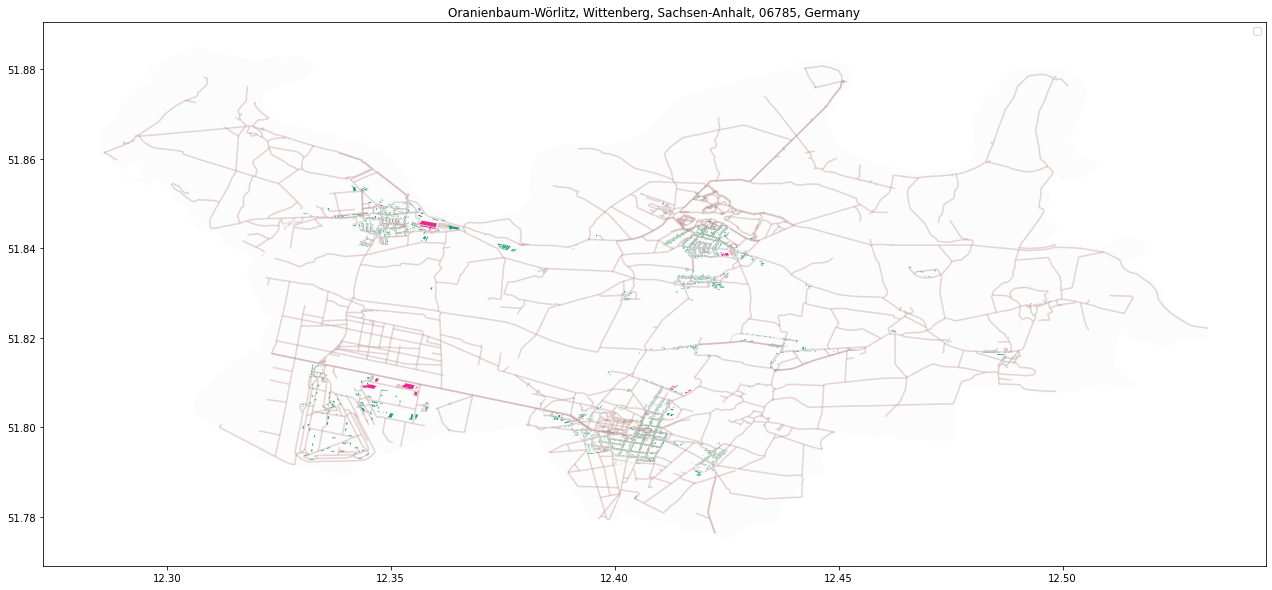

In [68]:
locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}
plotrange=0.02
neighbourhood = 3
print()


fig, ax = plt.subplots(figsize=(25,10))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='black' ,alpha=0.01)
edges.plot(ax=ax, color='#BC8F8F', alpha=0.2)

for building_type in locationTypeColors:
    buildings[buildings['building_type']==building_type].plot(ax=ax, color=locationTypeColors[building_type], label=building_type, legend=False,legend_kwds={'frameon':False, 'loc':'lower right'})
    #ax.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H', c=locationsCmap1(5))
    #ax.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M', c=locationsCmap1(7))
    #ax.set_label('s')
    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles=[building_type], loc='lower right')
plt.legend()
plt.title(place_name)
plt.savefig(place_name+'_location_type_map.png', dpi=600)
#plt.legend()    
#ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
#ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)